# Assignment 2: Linear and Logistic Regressions
## BUS 20800: Big Data
## Due: 11:59 am on Apr 15, 2022
## Richard Huang, David Yang, Matthew Zhao

______

## Part I

## Problem 1: **Logistic Loss**



1.1 Calculate the derivative of the Sigmoid function. Can you write the derivative in terms of $\sigma(t)$ ?

$$
\sigma(t) = \frac{e^t}{1+e^t}
$$



**Answer**:<br>

$\displaystyle \frac{\partial}{\partial t} (\sigma(t)) = \frac{(1+e^t)e^{t} - e^{t}(e^{t})}{(1+e^t)^{2}} = \frac{e^{t}}{(1+e^t)^{2}} = \frac{e^{t}}{1+e^t} \cdot \frac{1}{1+e^t} = \frac{1}{1+e^t} \cdot \sigma(t)$

1.2  Recall from the lecture, in linear regression setting, we have:
$$
Minimize \ squared \ loss \iff Minimize \ deviance \iff  Maximize\  likelihood
$$
    
As for the logistic regression, we also have a loss similar to the squared loss, namely logistic loss, defined as:
$$
    L = \sum_{i = 1}^{N} [log(1+e^{\beta^T x_i}) - y_ix_i^T \beta]
$$
    
Show that the following equivalence relationship for logistic regression holds.

$$
Minimize \ logistic \ loss \iff Minimize \ deviance \iff  Maximize\  likelihood
$$

**Answer**:<br>
WTS that the expressions for Logistic Loss ($L$), Deviance ($D$), and Likelihood ($l$) are proportional:<br>
$\displaystyle D  = -2\log{(l)} = $ <br>$\displaystyle -2 \sum_{i=1}^{n} (y_{i}\log{(p_{i})} + (1-y_{i})\log{(1-p_{i})} = -2 \sum_{i=1}^{n} (y_{i}\log{(\frac{e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}})} + (1-y_{i})\log{(1-\frac{e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}})}$<br>
$\displaystyle = -2 \sum_{i=1}^{n} (y_{i}\log{(\frac{e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}})} + (1-y_{i})\log{(\frac{1}{1+e^{x_{i}^{T}\beta}})}$<br>
$\displaystyle = -2 \sum_{i=1}^{n} {y_{i}}\log{(e^{x_{i}^{T}\beta})} - {y_{i}}\log{(1+e^{x_{i}^{T}\beta})} + ({1-y_{i}})\log{(1)} - ({1-y_{i}})\log{(1+e^{x_{i}^{T}\beta})}$<br>
$\displaystyle = -2 \sum_{i=1}^{n} y_{i} x_{i}^{T}\beta  - \log{(1+e^{x_{i}^{T}\beta})}$<br>


<br>
$\displaystyle L = \sum_{i = 1}^{N} [log(1+e^{\beta^T x_i}) - y_ix_i^T \beta] \propto \log{l} = \sum_{i=1}^{n} \log{(\frac{e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}})^{y_{i}} (\frac{1}{1+e^{x_{i}^{T}\beta}})^{1-y_{i}}} = \sum_{i=1}^{n} {y_{i}}\log{(\frac{e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}})} +({1-y_{i}})\log{(\frac{1}{1+e^{x_{i}^{T}\beta}})}$<br>
$\displaystyle = \sum_{i=1}^{n} {y_{i}}\log{(e^{x_{i}^{T}\beta})} - {y_{i}}\log{(1+e^{x_{i}^{T}\beta})} + ({1-y_{i}})\log{(1)} - ({1-y_{i}})\log{(1+e^{x_{i}^{T}\beta})}$<br>
$\displaystyle = \sum_{i=1}^{n} y_{i} x_{i}^{T}\beta  - \log{(1+e^{x_{i}^{T}\beta})}$<br>

Since Logistic Loss and Deviance are proportional to log likelihood, we can conclude that minimizing logistic loss and deviance are equivalent to maximizing likelihood. 

1.3 Calculate the derivative of the log likelihood with respect to weight $\beta$. 



**Answer**:<br>
Derivative wrt $\beta$: 
Given that$\displaystyle = \sum_{i=1}^{n} y_{i} x_{i}^{T}\beta  - \log{(1+e^{x_{i}^{T}\beta})}$ from (1.2), $\displaystyle \frac{\partial \log{(l)}}{\partial \beta} = \sum_{i=1}^{n} y_{i} x_{i}^{T} - \frac{x_{i}^{T}e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}}$<br>
$\displaystyle = \sum_{i=1}^{n} x_{i}^{T} (y_{i}  - \frac{1}{1+e^{-x_{i}^{T}\beta}})$

1.4 Redo the exercise 1.3 but with logistic loss, are the results the same?

**Answer**:<br>
Derivative wrt $\beta$: 
Given that $L \displaystyle = \sum_{i = 1}^{N} [log(1+e^{\beta^T x_i}) - y_ix_i^T \beta]$, $\displaystyle \frac{\partial L}{\partial \beta} = \sum_{i=1}^{n} \frac{x_{i}^{T}e^{x_{i}^{T}\beta}}{1+e^{x_{i}^{T}\beta}} - y_{i} x_{i}^{T}$<br>
$\displaystyle = \sum_{i=1}^{n} x_{i}^{T} (\frac{1}{1+e^{-x_{i}^{T}\beta}}  - y_{i})$

______

## Problem 2: **Classification via Logistic Regression** 


2.1 Logistic regression is a popular linear classifier, that assigns a label 0 or 1 to individuals. Show the following equivalence: 
$$
{\beta}^T x>0\iff P(Y = 1|X = x)> P(Y=0|X=x),   \nonumber
$$

which implies that the decision boundray of a logistic regression is 
$$
{\beta}^T x = 0.
$$



**Answer**:<br>
$P(Y=1|X) = \displaystyle \frac{e^{x_{i}^{T}}}{1+e^{x_{i}^{T}}}$<br>
$P(Y=0|X) = 1-P(Y=1|X)$<br>
$P(Y=0|X) = 1- \displaystyle \frac{e^{x_{i}^{T}}}{1+e^{x_{i}^{T}}} = \frac{1}{1+e^{x_{i}^{T}}}$<br>
$P(Y=1|X=x) > P(Y=0|X=x) \Rightarrow  \displaystyle \frac{e^{x_{i}^{T}}}{1+e^{x_{i}^{T}}} > 1- \frac{e^{x_{i}^{T}}}{1+e^{x_{i}^{T}}}$<br>
$\Rightarrow \displaystyle e^{x_{i}^{T}} > 1 + e^{x_{i}^{T}} - e^{x_{i}^{T}} \Rightarrow \log{(e^{x_{i}^{T}})} > \log{(1)} \Rightarrow x_{i}^{T} > 0$

______

# Part II

In [1]:
# Set up codes
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, rc={'figure.figsize':(15,8)}, font_scale=1.2)
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
!pip install kaleido

from sklearn.datasets import make_moons, make_circles, make_blobs


Defaulting to user installation because normal site-packages is not writeable


## Problem 3: Understanding the decision boundary



This exercise helps you visualize the decision boundary of a binary classification problem. 

### Part 1. Data Generating Process

We first generate five distinct datasets used in this execise for you. You don't need modify any codes here.

In [2]:
# DGP
random_seed = np.random.seed(0)

n_samples   = 1500

# Generate 2-dimensional x variables and y lables that follow a standard linear logistic regression model. Half of 
# the y labels are 1s. 
balanced    = make_blobs(n_samples=n_samples, random_state=random_seed, centers=2, center_box = (-4,4))

# Generate circle shaped data
noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Generate Moon shaped data
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)

# Generate 2-dimensional random x variables with randomly generated labels
label = [0] * n_samples
for i in np.random.randint(0,n_samples,int(n_samples/2)):
    label[i] = 1
    
no_structure = np.random.rand(n_samples, 2), label

# Generate 2-dimensional x variables and y lables that follow a standard linear logistic regression model. In this DGP,
# the y-labels are rather imbalanced, that is, 100 y labels are 1s, whereas 1500 labels are 0s.
imbalanced = make_blobs(n_samples = [n_samples, 100],random_state = random_seed, cluster_std = [1.5,0.1],center_box = (-3,3))


from Logistic_simulation import Generate_data

# Prepare data in dataframe format for the following analysis.
df_circle       = Generate_data(noisy_circles)
df_moon         = Generate_data(noisy_moons)
df_balanced     = Generate_data(balanced)
df_no_structure = Generate_data(no_structure)
df_imbalanced   = Generate_data(imbalanced)

Run the following cell to visualize the data generated above.

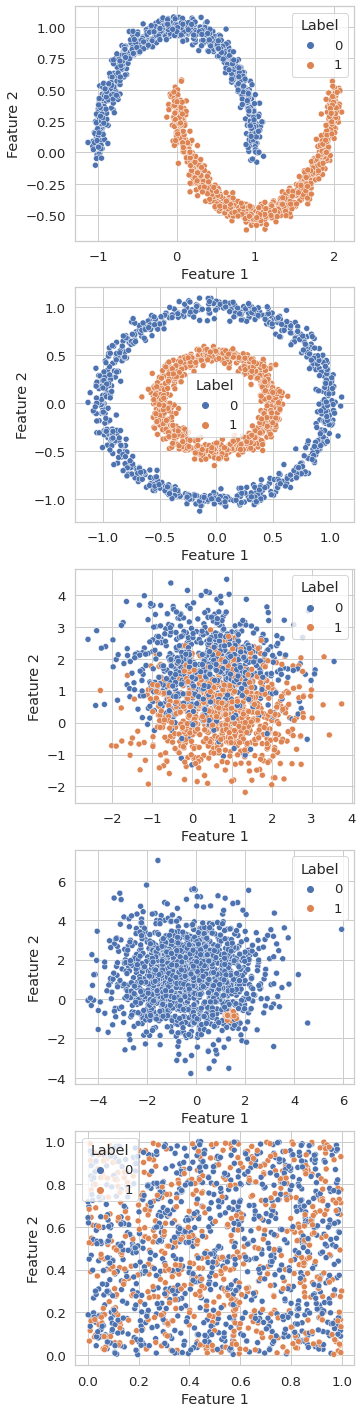

In [3]:
# Input data visualization
plt.figure(figsize = (5,25))

# Moon shape dataset
plt.subplot(5,1,1)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_moon)

# Circle shape dataset
plt.subplot(5,1,2)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_circle)

# Balanced dataset
plt.subplot(5,1,3)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_balanced)

# No structure dataset
plt.subplot(5,1,5)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_no_structure)

# Imbalanced dataset
plt.subplot(5,1,4)
sns.scatterplot('Feature 1', 'Feature 2', hue = 'Label', data = df_imbalanced)

plt.show()

### Part 2. Verify Gradients

In this section, we implement and verify the gradient formula derived in Part I. We will use this gradient later in Part 3 to implement logistic regression on our own.




Please finish the Get_gradient_formula in Logistic_simulation.py before running the next cell.

In [4]:
from Logistic_simulation import Get_gradient_formula, mapFeature


Let's calculate gradient using any dataset generated from above. 


In [5]:
# First, choose the x variables from a dataset, e.g., df_balanced. Make sure the dimension of X is 1500 x 2 or 1600 x 2 
# and the dimension of y is 1500 x 1 or 1600 x 1. Pick an arbitrary 2x1 vector theta, at which point you evaluate the 
# gradients.

X = np.array(df_balanced[['Feature 1','Feature 2']])
X.shape = (1500,2)
y = np.array(df_balanced['Label']).transpose()
y.shape = (1500,1)

theta = np.array([[1,2]]).T
theta

array([[1],
       [2]])

In [6]:
# Evaluate gradient of the log likelihood (function of data) at theta:  

gradient_formula = Get_gradient_formula(theta, X, y)
gradient_formula

array([[ 213.81133456],
       [1327.7198756 ]])

Recall that the gradient is defined as:

$$
\nabla_x = \frac{\partial f(x,\cdots)}{\partial x} =\lim_{h\to 0} \frac{f(x+h,\cdots)-f(x-h,\cdots)}{2h}
$$

Now we use this method for check your results. Run the following cell to compare gradient_formula and gradient_numeric below.

In [7]:
from Logistic_simulation import Get_gradient_numeric, Gradient_check
# Run these codes to check your answer. 
gradient_numeric = Get_gradient_numeric(theta, X, y)

Gradient_check(gradient_formula,gradient_numeric)

1.1058550099620814e-06

### Part 3. Visualize the Decision Boundary

With the above preparation, we are ready to visualize the decision boundary. 

In [8]:
# Visualize the decision boundary
from Logistic_simulation import mapFeature
from Logistic_simulation import Generate_boundary
from Logistic_simulation import plotDecisionBoundary
from Logistic_simulation import lossFunc

Choose an appropriate degree (e.g., 1, 2, ...) to run logistic regression with $x_1$, $x_2$, $x_1^2$, $x_2^2$, ...., $x_1^{degree}$, $x_2^{degree}$ and their cross products as regressors $x$ for each dataset, respectively. If you choose the right degree, the lables will be seperated by the hyperplane $x^T \beta = 0$.  

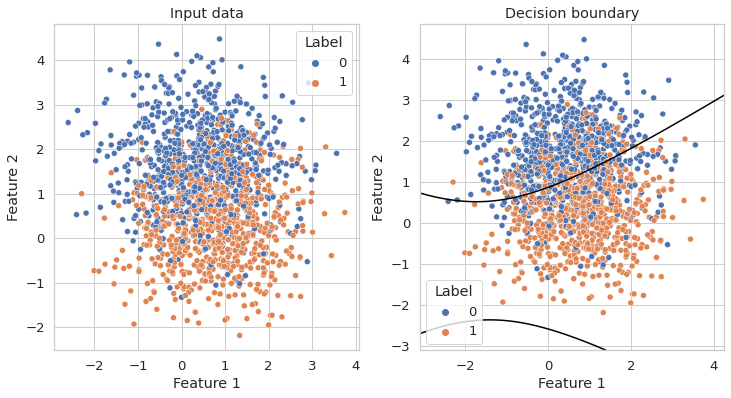

In [9]:
# Balanced dataset

Generate_boundary(df_balanced,2)

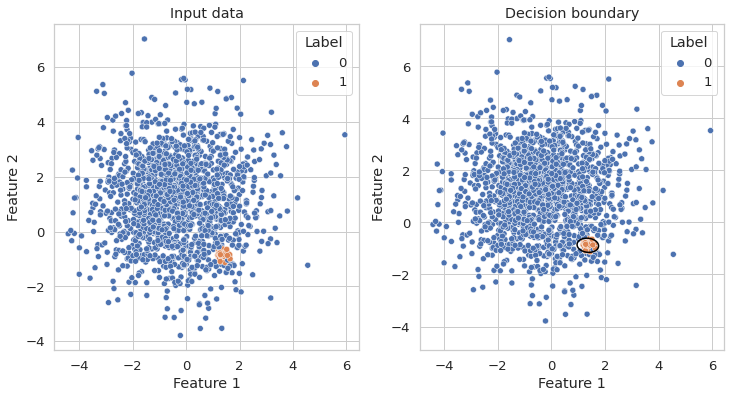

In [10]:
# Imbalanced dataset
Generate_boundary(df_imbalanced,2)

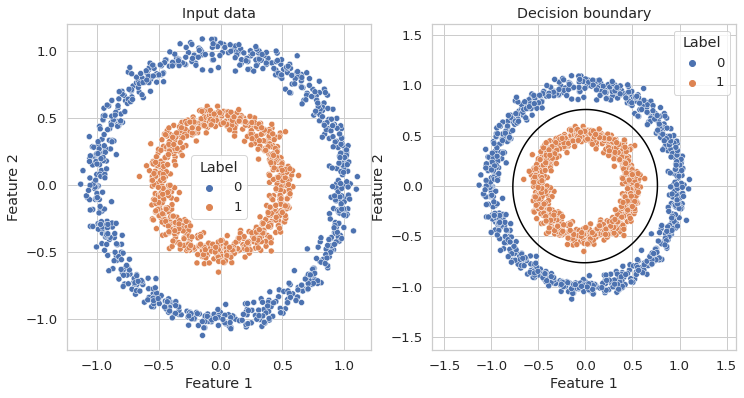

In [11]:
# Circle dataset
Generate_boundary(df_circle,2)

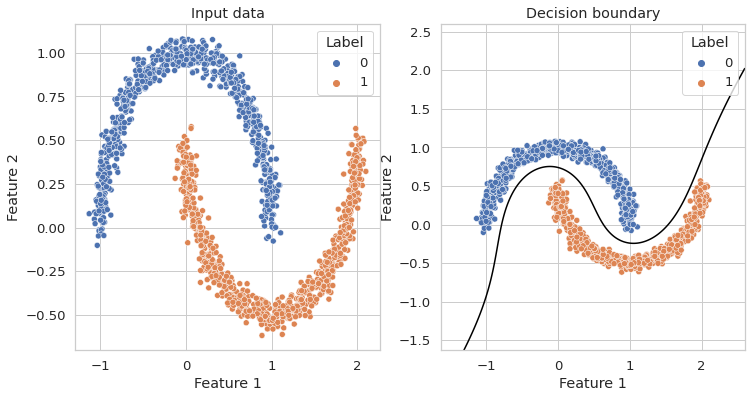

In [12]:
# Moon dataset
Generate_boundary(df_moon,3)

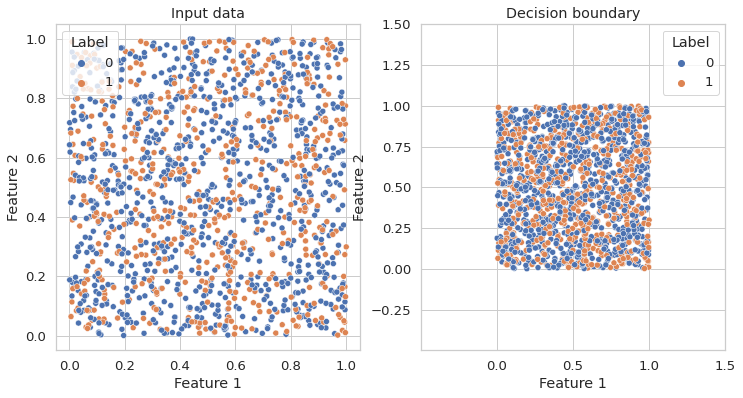

In [13]:
# Dataset without structure
Generate_boundary(df_no_structure,2)

What conclusions can you make?

**Answer**: Logistic Regression works best on linearly separable data and given enough degrees and complexity, it is able to learn the decision boundary pretty well if the data is linearly separable, as seen in the subplots 2, 3, and 4 above. However, since the data is not linearly separable for the "balanced" dataset in subplot 1, the decision boundary is not as clear as the previous datasets and subplots. Even if we increase the complexity, we start overfitting to the data and the behavior of the decision boundary becomes abnormal. Lastly, for the dataset without structure, logistic regression cannot learn any structure or decision boundary because there is no pattern and the data is mostly noise.

______

## Problem 4: Default Prediction

### Background

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub used to be the world's largest peer-to-peer lending platform before it closed this business.


The data given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


When a person applies for a loan, there are two types of decisions that could be taken by the company:
* **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

 1. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
 2. Current: Applicant is in the process of paying the instalments. These candidates are not labelled as 'defaulted'.
 3. Charged-off: Applicant has not paid the installments in due time for a long period of time, i.e. he/she has defaulted on the loan


* **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transnational history of those applicants with the company and so this data is not available with the company (and thus not in this dataset)


In this exercise, you will work as a group of data scientists for LendingClub to find out the driving factors behind loan default. And use these variables to identify risky loan applicants.

We will mainly focus on the binary classification case for simplicity, 'Fully Paid' and 'Charged Off'. 

And for each variable, you can see its description in Variable_description.pdf.


In [14]:
# Load training data
_DATA_DIR = "/classes/2080001_spr2022/Data/"
loan_data = pd.read_csv('%s/loan_train.csv'%(_DATA_DIR), index_col =0)
loan_test = pd.read_csv('%s/loan_test.csv'%(_DATA_DIR), index_col =0)

In [15]:
loan_data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status
176062,5525.0,36 months,15.61%,193.19,D,D1,NaN,NaN,OWN,13213.20,...,6.0,1.0,3779.0,72.7%,13.0,f,Individual,0.0,1.0,Charged Off
118664,40000.0,36 months,6.67%,1229.06,A,A2,land surveryor,5 years,OWN,80000.00,...,18.0,0.0,13573.0,15.1%,36.0,w,Individual,0.0,0.0,Fully Paid
173625,6000.0,36 months,6.62%,184.23,A,A2,Store Mgr,6 years,MORTGAGE,72000.00,...,17.0,0.0,5991.0,6.2%,39.0,f,Individual,6.0,0.0,Fully Paid
52317,15000.0,36 months,12.35%,500.73,B,B4,Pinellas County Schools,10+ years,OWN,42916.68,...,11.0,0.0,13173.0,78.9%,16.0,w,Individual,0.0,0.0,Fully Paid
171574,23000.0,36 months,15.31%,800.80,C,C4,Combat Arms Instructor,10+ years,RENT,60634.20,...,7.0,0.0,28922.0,76.3%,21.0,w,Individual,0.0,0.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50911,7075.0,36 months,26.30%,286.19,E,E5,DESIGNER,2 years,RENT,60000.00,...,13.0,0.0,5035.0,95%,14.0,f,Individual,0.0,0.0,Charged Off
3305,28000.0,36 months,5.32%,843.22,A,A1,NaN,NaN,OWN,128000.00,...,11.0,0.0,42994.0,38.6%,21.0,w,Individual,1.0,0.0,Fully Paid
92146,28000.0,36 months,14.09%,958.20,B,B5,The Coca-Cola Company,8 years,MORTGAGE,79800.00,...,15.0,0.0,29080.0,77.3%,29.0,f,Individual,2.0,0.0,Fully Paid
26985,20000.0,36 months,7.49%,622.04,A,A4,Sales manager,10+ years,MORTGAGE,65000.00,...,12.0,0.0,23314.0,47.2%,28.0,f,Individual,2.0,0.0,Fully Paid


In [16]:
# checking intersection of columns
len(list(set(loan_test.columns).intersection(loan_data.columns)))

27

In [17]:
loan_test["addr_state"]

31011     WA
87620     OK
36693     SD
54179     TX
4619      VA
          ..
102222    GA
159648    AR
103589    MN
39884     GA
69451     VA
Name: addr_state, Length: 371822, dtype: object

### Part 1: Exploratory Data Analysis

1. It is easier to write functions to visualize different types of data. Finish these functions in EDA.py, Get_category_visualize, Get_numeric_visualize, Get_map_visualize(df =loan_data, x = 'addr_state',y ='loan_status'), Get_text_visualize. Use these functions to visualize the data.


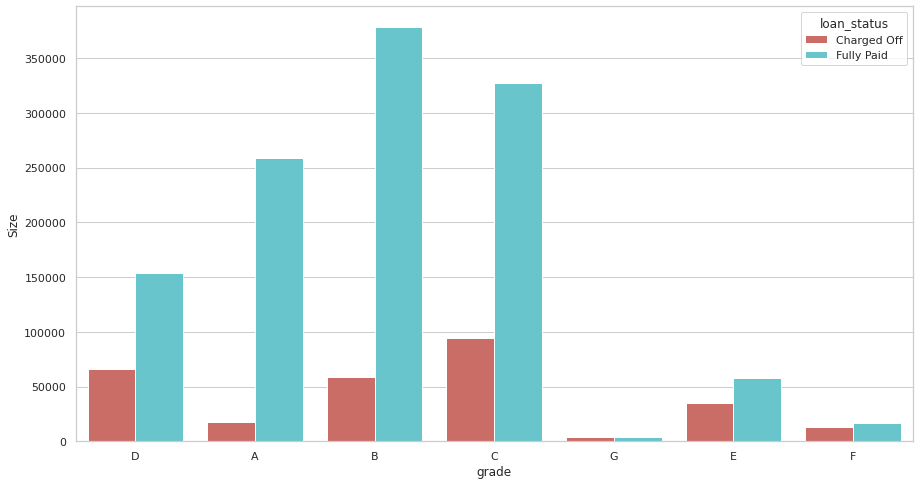

In [18]:
# Visualize categorical data

from EDA import Get_category_visualize

# Here x = grade is just for your reference
Get_category_visualize(df = loan_data, x = 'grade', y = 'loan_status')

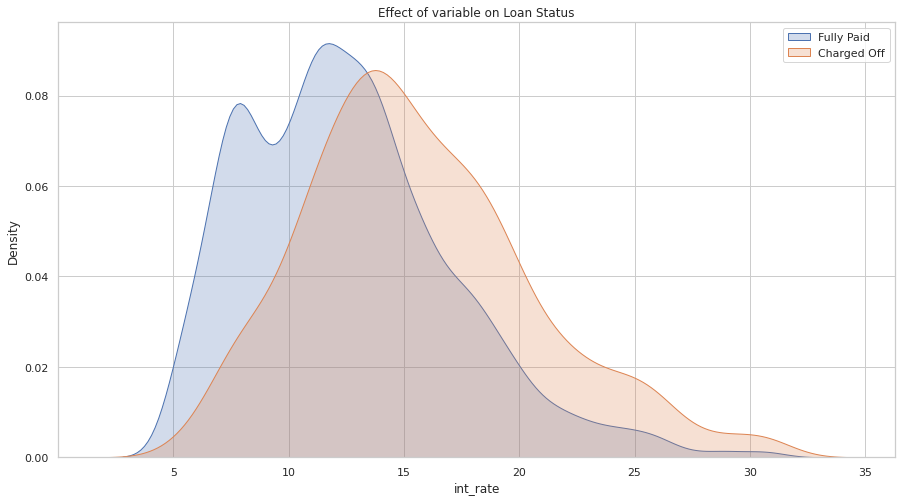

In [19]:
# Visualize numerical data
from EDA import Get_numeric_visualize
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'].str.strip('%'))
# Here x = int_rate is just for your reference
Get_numeric_visualize(df = loan_data, x = 'int_rate', y = 'loan_status')

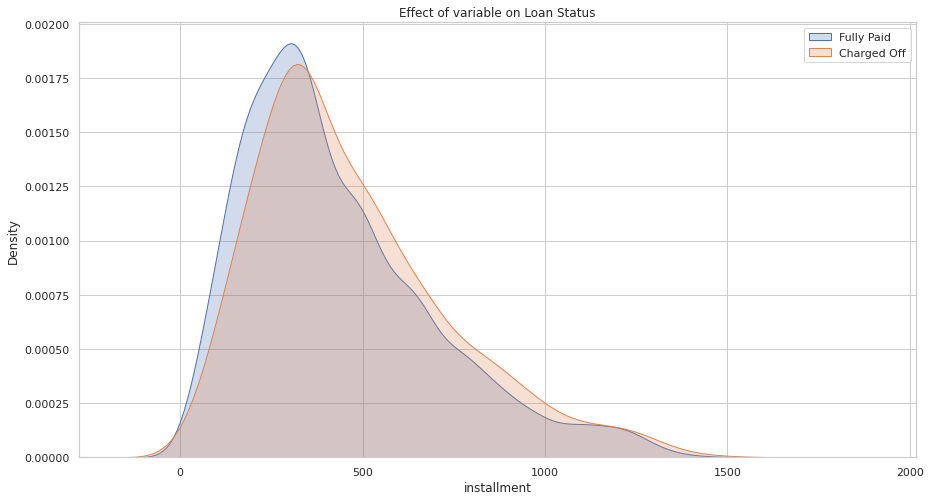

In [20]:
Get_numeric_visualize(df = loan_data, x = 'installment', y = 'loan_status')

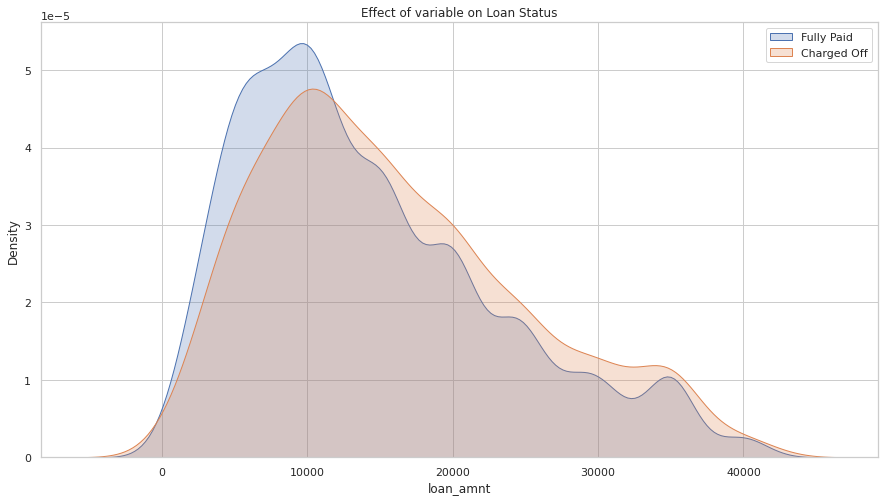

In [21]:
Get_numeric_visualize(df = loan_data, x = 'loan_amnt', y = 'loan_status')

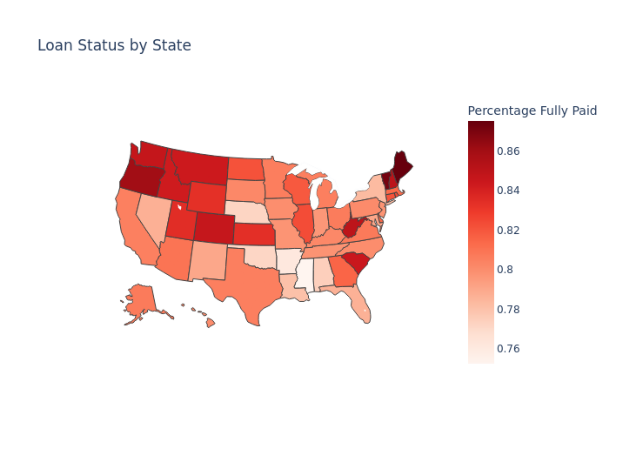

In [22]:
# Visualize spatial data
from EDA import Get_map_visualize

import matplotlib.image as mpimg
Get_map_visualize(df =loan_data, x = 'addr_state',y ='loan_status')
plt.axis('off')
plt.rcParams['axes.grid'] = False
img = mpimg.imread('loan_status.png')
imgplot = plt.imshow(img)


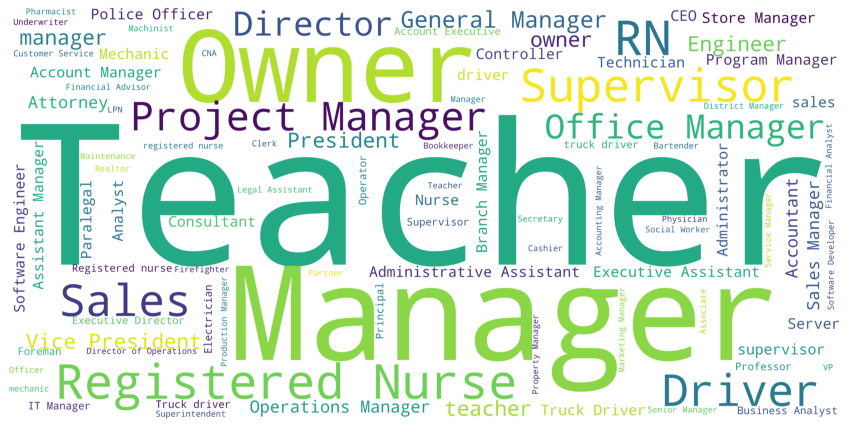

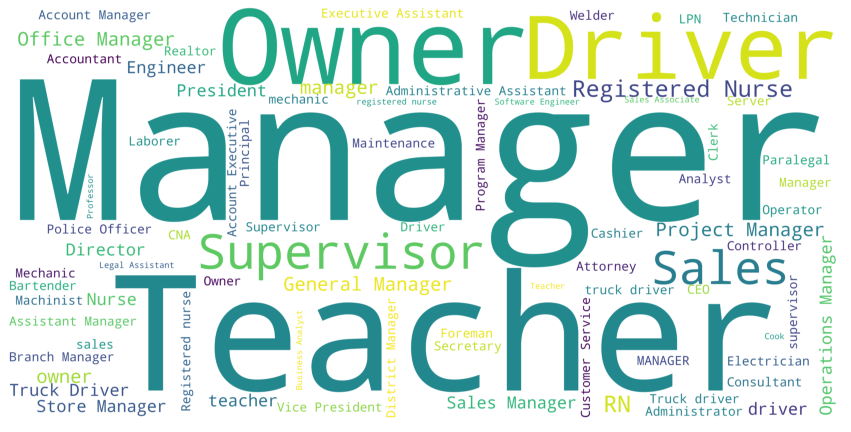

In [23]:
# Visualize text data
from EDA import Get_text_visualize

# Here x = emp_title is just for your reference
Get_text_visualize(df = loan_data,x = 'emp_title' ,y = 'loan_status')

Based on the EDA, could you answer the following questions?

 + Does this dataset has balanced labels?
 + For the numerical type in this dataset, is there some strong co-linearity?
 + Which state has the highest default rate? How about the lowest?
 + Which job is associated with highest default rate?
 + What pattern can you find in loan grade and loan status?
 + Which year has the highest total amount of loans issued?
 + Which variables might be good indicators for loan default?

- No, this dataset does not have balanced labels. There are a lot more fully paid loans than unpaid loans
- Higher levels of interest are associated with higher default rates, according to the density graph
- There seems to be a collinearity between loan amount and loan installment
- The state with the highest default rate is Mississippi. The state with the lowest default rate is Maine
- The job associated with the highest default rate is a manager, second being teacher. That being said, the job associated with the lowest default rate (i.e highest fully paid rate) is also a teacher. This may be because there are simply a lot of teachers and managers in the dataset.
- Higher lettered loans (D, E, F, G) have more default rates than lower lettered loans (A - C)
- Loan grade, interest rate, and state are good initial indicators for loan default

### Part 2: Data Cleaning

2. Here we offer you an example how we do the cleaning procedure on each variable. You can have your own cleaning procedure.

In [24]:
# Missing values
# Look at the percentage of missing values for each variable
loan_data.isna().sum(axis = 0)/ loan_data.shape[0] * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.993611
emp_length              6.230678
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   1.153376
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.075036
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                2.541677
pub_rec_bankruptcies    0.037989
loan_status             0.000000
dtype: float64

In [25]:
# Emp_title, Title have too many categories, not suitable for construct dummy variable
# Delete these two variabls
print(len(loan_data.emp_title.unique()))
print(len(loan_data.title.unique()))

loan_data.drop(columns = ['emp_title','title'],axis = 1, inplace=True)

383625
50998


In [26]:
# Change term value from categorical to numerical value
term_values = {' 36 months': 36, ' 60 months': 60}
loan_data['term'] = loan_data.term.map(term_values)

In [27]:
# Change employment length from categorical into numerical value
emp_length_values = {'< 1 year': 0, 
                     '1 year': 1,
                     '2 years' :2,
                     '3 years' : 3,
                     '4 years' : 4,
                     '5 years' : 5,
                     '6 years' : 6,
                     '7 years' : 7,
                     '8 years' : 8,
                     '9 years' : 9,
                     '10+ years' : 10}
loan_data['emp_length'] = loan_data.emp_length.map(emp_length_values)

In [28]:
# Varriable grade offers the same information as sub_grade
loan_data.drop(columns = ['grade'], inplace = True)

In [29]:
# Zip code offers the same information as addr_state
loan_data.drop(columns = ['zip_code'], inplace = True)

In [30]:
# Get dummy variable, be careful with the colinearity
dummy_col = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership','addr_state']
loan_data = pd.get_dummies(loan_data, columns=dummy_col, drop_first=True)

In [31]:
# Issue_d has the data leakage problem, wa can't get access to the issuance date until we know its true loan_status
loan_data.drop('issue_d', axis=1, inplace=True)

In [32]:
# Care about year information, not month
loan_data['earliest_cr_line'] = loan_data.earliest_cr_line.apply(lambda x: int(x[-4:]))

In [33]:
# For variable mort_acc, fill the missing value with median
loan_data.mort_acc.fillna(loan_data.mort_acc.median(), inplace = True)

In [34]:
# Drop the other missing values
loan_data.dropna(inplace = True)

In [35]:
# Change predicted value into binary numerical value 0,1
status_values = {'Fully Paid': 0, 'Charged Off': 1}
loan_data['loan_status'] = loan_data.loan_status.map(status_values)

In [36]:
# turn int_rate,revol_util into numeric
#loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'].str.strip('%'))
loan_data['revol_util'] = pd.to_numeric(loan_data['revol_util'].astype('str').str.strip('%'))

### Part 3: Logistic Regression

In [37]:
y = loan_data.loan_status.to_numpy()
X = loan_data.drop('loan_status',axis = 1).to_numpy()

Please finish the codes in Logistic_regression.py. 

In [38]:
# Perform the logistic regression
import statsmodels.api as sm
from Logistic_regression import Logistic_regression
p_value, result = Logistic_regression(X,y)

Optimization terminated successfully.
         Current function value: 0.443545
         Iterations 7


To evaluate the performance of your model, we use a separate dataset. Again, you should first clean this dataset similar to Part 2.

In [39]:
X_test = loan_test

In [40]:
# Data cleaning procedure for X_test
X_test.isna().sum(axis = 0)/ X_test.shape[0] * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               7.074084
emp_length              6.297368
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
purpose                 0.000000
title                   1.142213
zip_code                0.000269
addr_state              0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.074229
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                2.549338
pub_rec_bankruptcies    0.035501
dtype: float64

In [41]:
X_test.drop(columns = ['emp_title','title'],axis = 1, inplace=True)

In [42]:
term_values = {' 36 months': 36, ' 60 months': 60}
X_test['term'] = X_test.term.map(term_values)

In [43]:
emp_length_values = {'< 1 year': 0, 
                     '1 year': 1,
                     '2 years' :2,
                     '3 years' : 3,
                     '4 years' : 4,
                     '5 years' : 5,
                     '6 years' : 6,
                     '7 years' : 7,
                     '8 years' : 8,
                     '9 years' : 9,
                     '10+ years' : 10}
X_test['emp_length'] = X_test.emp_length.map(emp_length_values)

In [44]:
X_test.drop(columns = ['grade'], inplace = True)
X_test.drop(columns = ['zip_code'], inplace = True)
dummy_col = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership','addr_state']
X_test = pd.get_dummies(X_test, columns=dummy_col, drop_first=True)
X_test.drop('issue_d', axis=1, inplace=True)

In [45]:
X_test['earliest_cr_line'] = X_test.earliest_cr_line.apply(lambda x: int(x[-4:]))
X_test.mort_acc.fillna(X_test.mort_acc.median(), inplace = True)

In [46]:
X_test.dropna(inplace = True)

In [47]:
X_test['int_rate'] = pd.to_numeric(X_test['int_rate'].str.strip('%'))
X_test['revol_util'] = pd.to_numeric(X_test['revol_util'].astype('str').str.strip('%'))

You may notice, for the test data, you don't have access to the true label. 

Simply output your prediction based on the test data, y_pred, and we will calculate the accuracy for you.

In [48]:
# OOS prediction
y_pred = result.predict(X_test)
y_pred = y_pred.apply(lambda x: int(x+0.5))

In [49]:
# Run this to save the data and upload this table.
y_pred.to_csv(path_or_buf = 'result.csv')

**<font color = red>[Bonus question]**: Now it's time to review the results you have obtained. Does your result make sense? If not, what problems do you find, and any ideas about how to fix them?
    
**Answer**:

In [50]:
# checking proportion of defaults in training and test sets\n",
print(y_pred.sum() / y_pred.shape[0])
print(loan_data['loan_status'].sum() / loan_data.shape[0])

0.014254968837908276
0.1902698892187886


In [51]:
temp = pd.DataFrame(result.summary().tables[1])
temp.columns = temp.iloc[0,:]
temp = temp.iloc[1:]
coef_pval = pd.DataFrame(temp.iloc[:,[1,4]])

In [52]:
x_var = pd.DataFrame(X_test.columns)
x_var.index = np.arange(1, len(x_var) + 1)

In [53]:
beta_analysis = pd.merge(x_var, coef_pval, left_index=True, right_index=True)
beta_analysis.columns = ['x_var','coef','p_val']

In [54]:
beta_analysis['p_val'] = beta_analysis['p_val'].astype(str).astype(float)

In [55]:
signf_betas = beta_analysis[beta_analysis['p_val'] < 0.05]

In [56]:
for x in range(signf_betas.shape[0]):
    print(signf_betas.iloc[x,[0,1]])

x_var     loan_amnt
coef     -1.134e-05
Name: 1, dtype: object
x_var          term
coef         0.0229
Name: 2, dtype: object
x_var      int_rate
coef         0.0186
Name: 3, dtype: object
x_var    installment
coef          0.0008
Name: 4, dtype: object
x_var    emp_length
coef        -0.0059
Name: 5, dtype: object
x_var    annual_inc
coef     -4.776e-07
Name: 6, dtype: object
x_var           dti
coef         0.0084
Name: 7, dtype: object
x_var    earliest_cr_line
coef              -0.0021
Name: 8, dtype: object
x_var      open_acc
coef         0.0216
Name: 9, dtype: object
x_var       pub_rec
coef         0.0257
Name: 10, dtype: object
x_var     revol_bal
coef     -4.057e-06
Name: 11, dtype: object
x_var    revol_util
coef        -0.0003
Name: 12, dtype: object
x_var     total_acc
coef        -0.0071
Name: 13, dtype: object
x_var      mort_acc
coef        -0.0561
Name: 14, dtype: object
x_var    pub_rec_bankruptcies
coef                   0.0818
Name: 15, dtype: object
x_var    sub_gr

In [57]:
loan_data.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
count,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06,...,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06,1.393016e+06
mean,1.478964e+04,4.215799e+01,1.316381e+01,4.456515e+02,5.934971e+00,7.926477e+04,1.836149e+01,1.999568e+03,1.170050e+01,2.028003e-01,...,2.084685e-03,1.544060e-02,8.325748e-02,7.328703e-03,2.822437e-02,2.104068e-03,2.151806e-02,1.330997e-02,3.450068e-03,2.166522e-03
std,8.999771e+03,1.048194e+01,4.827139e+00,2.677717e+02,3.708952e+00,1.294303e+05,1.045111e+01,7.475634e+00,5.591526e+00,5.908351e-01,...,4.561075e-02,1.232972e-01,2.762711e-01,8.529360e-02,1.656133e-01,4.582185e-02,1.451036e-01,1.145985e-01,5.863589e-02,4.649548e-02
min,5.000000e+02,3.600000e+01,5.310000e+00,4.930000e+00,0.000000e+00,1.050000e+03,-1.000000e+00,1.933000e+03,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,3.600000e+01,9.490000e+00,2.513000e+02,2.000000e+00,4.800000e+04,1.180000e+01,1.996000e+03,8.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.250000e+04,3.600000e+01,1.269000e+01,3.785900e+02,6.000000e+00,6.600000e+04,1.763000e+01,2.001000e+03,1.100000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+04,6.000000e+01,1.599000e+01,5.930600e+02,1.000000e+01,9.500000e+04,2.413000e+01,2.005000e+03,1.500000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+04,6.000000e+01,3.099000e+01,1.719830e+03,1.000000e+01,1.100000e+08,9.990000e+02,2.017000e+03,9.000000e+01,8.600000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [58]:
X_test.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
count,348019.000000,348019.000000,348019.000000,348019.00000,348019.000000,3.480190e+05,348019.000000,348019.000000,348019.000000,348019.000000,...,348019.000000,348019.000000,348019.000000,348019.000000,348019.000000,348019.000000,348019.000000,348019.000000,348019.000000,348019.000000
mean,14778.091067,42.158905,13.158073,445.24911,5.931573,7.906072e+04,18.335487,1999.565762,11.706668,0.202072,...,0.001980,0.015594,0.084062,0.007339,0.028363,0.002003,0.021453,0.013482,0.003362,0.002233
std,9003.005039,10.482458,4.825590,268.06082,3.707597,7.579727e+04,9.839760,7.483791,5.587641,0.571363,...,0.044451,0.123899,0.277480,0.085351,0.166009,0.044707,0.144889,0.115327,0.057884,0.047198
min,1000.000000,36.000000,5.310000,20.22000,0.000000,1.200000e+03,-1.000000,1944.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,36.000000,9.490000,250.59000,2.000000,4.800000e+04,11.780000,1996.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12300.000000,36.000000,12.690000,378.04000,6.000000,6.600000e+04,17.600000,2001.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,60.000000,15.990000,591.46000,10.000000,9.500000e+04,24.130000,2005.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40000.000000,60.000000,30.990000,1714.54000,10.000000,1.099920e+07,812.050000,2016.000000,88.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Interpretation of Results
First, we want to note that for our generate decision boundary and mapping functions, we were successfully able to implement gradient descent using our own code instead of the Ed suggestion which used outside packages. Given the decision boundaries we were able to plot, we believe that this implementation was able to get the optimal theta. 


We were able to successfully implement logit regression using a similar cleaning procedure for the test set. However, we immediately can see differences between the results from the training vs predicted results. Specifically, the proportion of defaults in the predictions is significantly lower than that of the training set. This means that if the observations for both sets are iid, our model has a serious issue with underestimating the likelihood of default. 


Moving on to the regressors, we examine all the statistically significant features of X_test at $p=0.05$. We find that the independent variables of term, interest rate, open account, public record, and public record of bankruptcy are both statistically signficant and also have large corresponding thetas (specifically these are the top 5). These are sensible explanatory variables given the context. Interest rate and public record of bankruptcy are strongly related to the riskiness of the loan, while the others are also features of loans which reveal information about the loanee indirectly. 


Finally, we examined the summary statistics of the training and test sets in an attempt to test our earlier hypothesis that the data are iid. Examining the mean and medians reveals little difference between the sets, indicating that they could be iid. However, to more robustly test this, we could examine the histograms of the data as well as perform actual hypothesis testing to see if that influenced large differences in our results. 